In [2]:
pip install pandas numpy matplotlib seaborn plotly statsmodels

In [14]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('retail_sales_dataset.csv')

# Verify successful loading
print("Data loaded successfully! First 5 rows:")
print(df.head())

Data loaded successfully! First 5 rows:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [16]:
#1. Initial Data Exploration
# Check dataset shape
print(f"Dataset dimensions: {df.shape}")

# Check column data types
print("\nData types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Basic statistics
print("\nNumerical columns statistics:")
print(df.describe())

# Categorical columns statistics
print("\nCategorical columns statistics:")
print(df.describe(include=['object', 'category']))

Dataset dimensions: (1000, 9)

Data types:
Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

Missing values:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Numerical columns statistics:
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.

In [17]:
#2. Data Cleaning & Preparation
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create new time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.day_name()

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")



Duplicate rows: 0


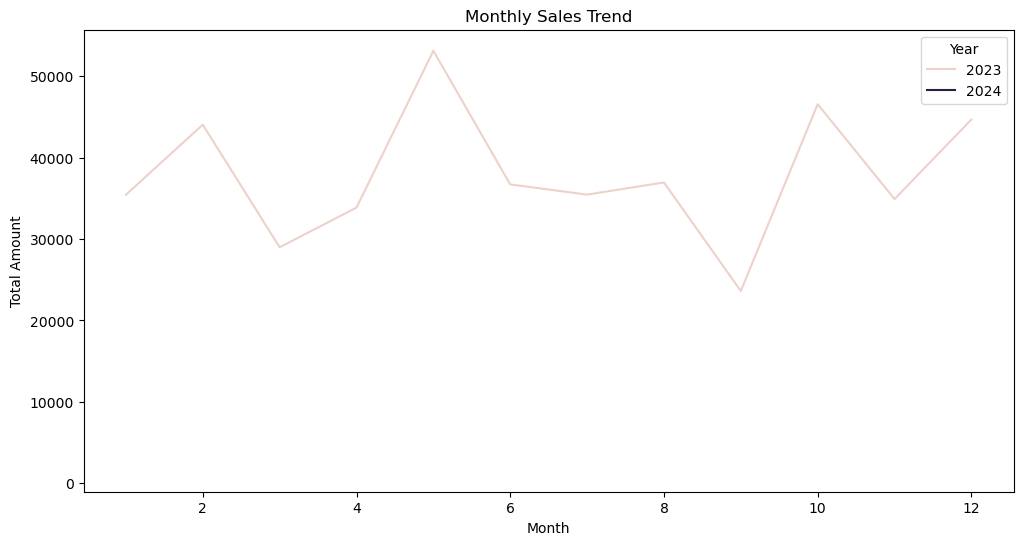

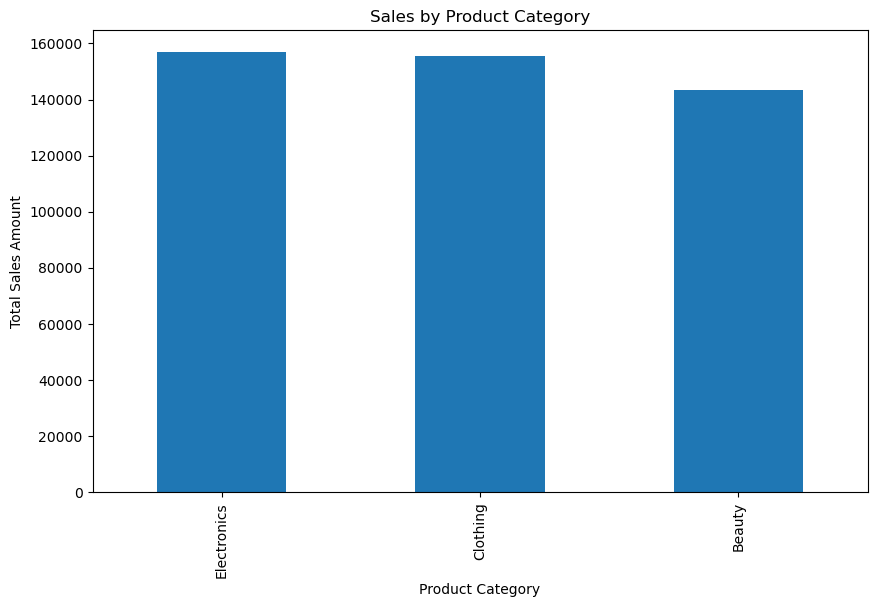

In [18]:
#3. Sales Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Monthly sales trend
monthly_sales = df.groupby(['Year', 'Month'])['Total Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Amount', hue='Year')
plt.title('Monthly Sales Trend')
plt.show()

# Top product categories by sales
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar')
plt.title('Sales by Product Category')
plt.ylabel('Total Sales Amount')
plt.show()

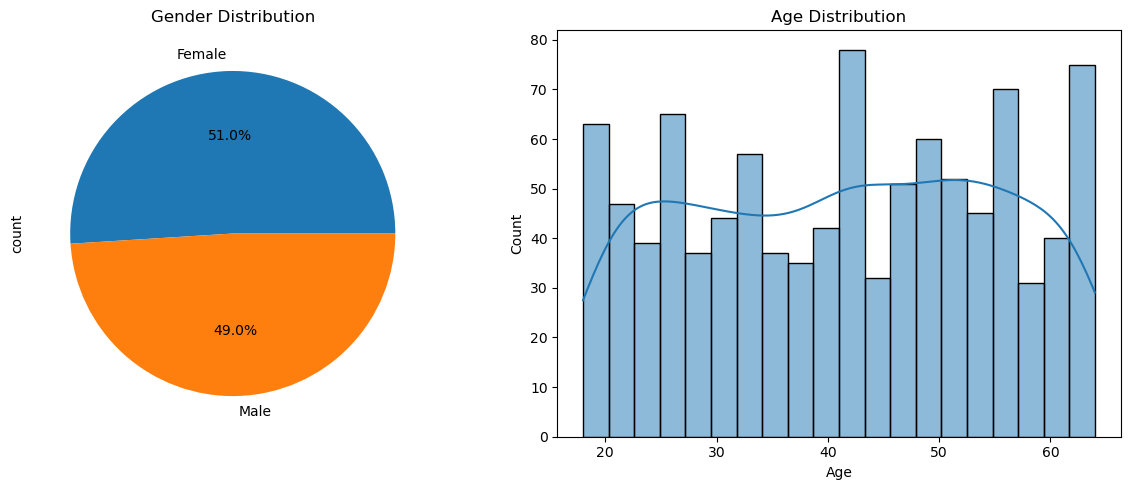

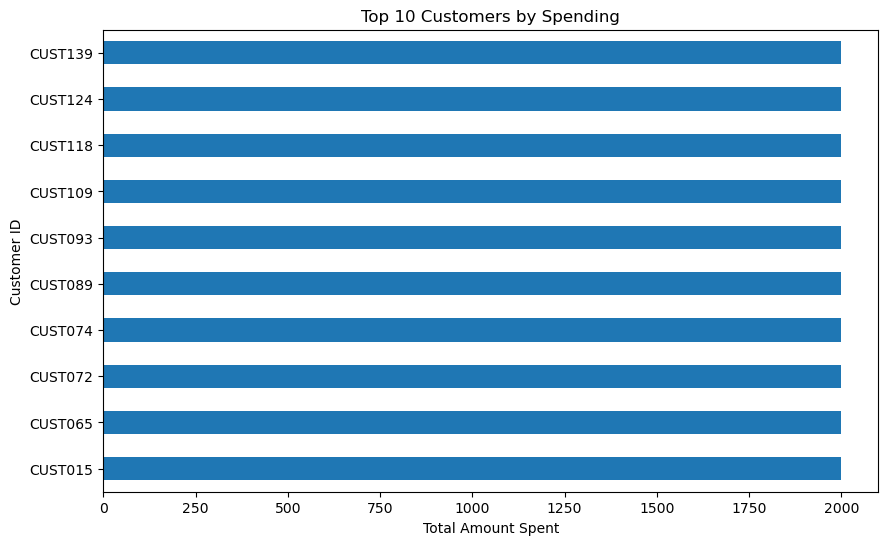

In [19]:
#4. Customer Analysis
# Customer demographics
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.tight_layout()
plt.show()

# Top customers by spending
top_customers = df.groupby('Customer ID')['Total Amount'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_customers.plot(kind='barh')
plt.title('Top 10 Customers by Spending')
plt.xlabel('Total Amount Spent')
plt.show()

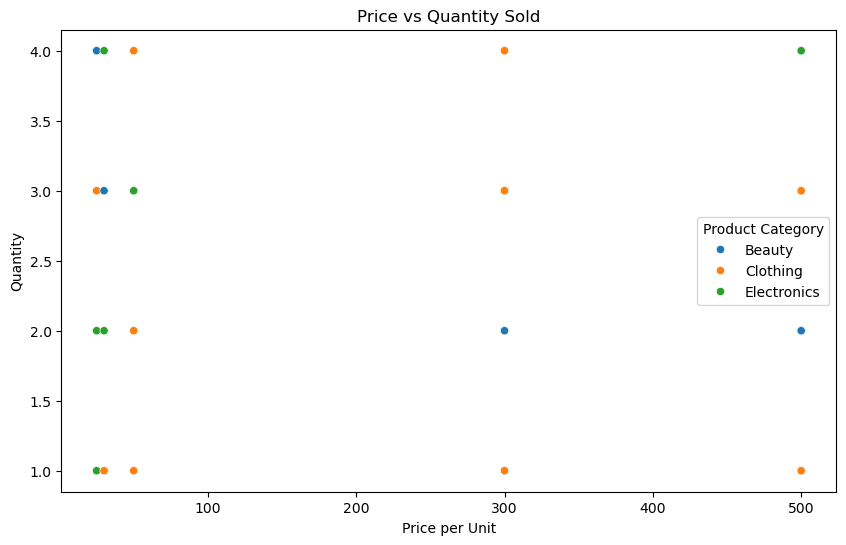


Product Category Performance:
                  Quantity  Total Amount  Transaction Count
Product Category                                           
Beauty                 771        143515                307
Clothing               894        155580                351
Electronics            849        156905                342


In [20]:
#5. Product Performance
# Price vs Quantity analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price per Unit', y='Quantity', hue='Product Category')
plt.title('Price vs Quantity Sold')
plt.show()

# Product category performance
category_performance = df.groupby('Product Category').agg({
    'Quantity': 'sum',
    'Total Amount': 'sum',
    'Transaction ID': 'count'
}).rename(columns={'Transaction ID': 'Transaction Count'})

print("\nProduct Category Performance:")
print(category_performance)

In [26]:
# Handle missing values - recommended approach
df = df.assign(
    Age=df['Age'].fillna(df['Age'].median()),
    Gender=df['Gender'].fillna(df['Gender'].mode()[0])
)

# Alternative approach (also warning-free)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# Fix the datetime conversion (typo in original)
df['Date'] = pd.to_datetime(df['Date'])  # Corrected from pd.to_dateline

# Fix the month extraction (typo in original)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month  # Corrected from dt.nonth
df['DayOfWeek'] = df['Date'].dt.day_name()

# Remove duplicates - this is fine as is
df = df.drop_duplicates()  # Alternative to inplace=True

=== Numerical Summary ===
              Age     Quantity  Price per Unit  Total Amount
count  1000.00000  1000.000000     1000.000000   1000.000000
mean     41.39200     2.514000      179.890000    456.000000
std      13.68143     1.132734      189.681356    559.997632
min      18.00000     1.000000       25.000000     25.000000
25%      29.00000     1.000000       30.000000     60.000000
50%      42.00000     3.000000       50.000000    135.000000
75%      53.00000     4.000000      300.000000    900.000000
max      64.00000     4.000000      500.000000   2000.000000

=== Categorical Summary ===
        Gender Product Category
count     1000             1000
unique       2                3
top     Female         Clothing
freq       510              351


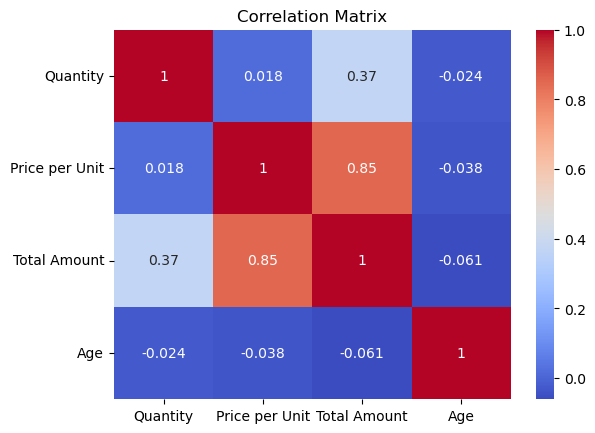

In [27]:
#3. Descriptive Statistics
print("=== Numerical Summary ===")
print(df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].describe())

print("\n=== Categorical Summary ===")
print(df[['Gender', 'Product Category']].describe())

# Correlation matrix
corr = df[['Quantity', 'Price per Unit', 'Total Amount', 'Age']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

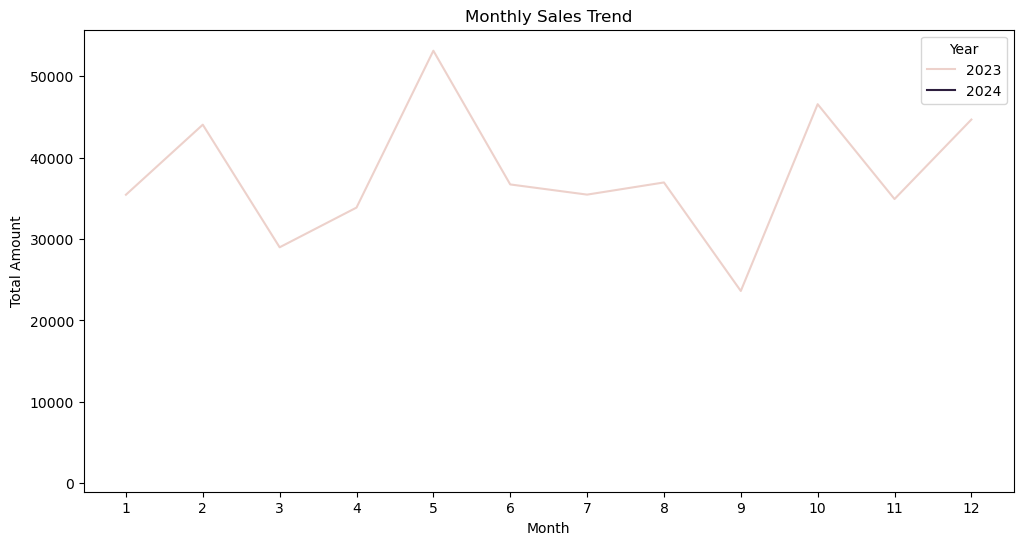

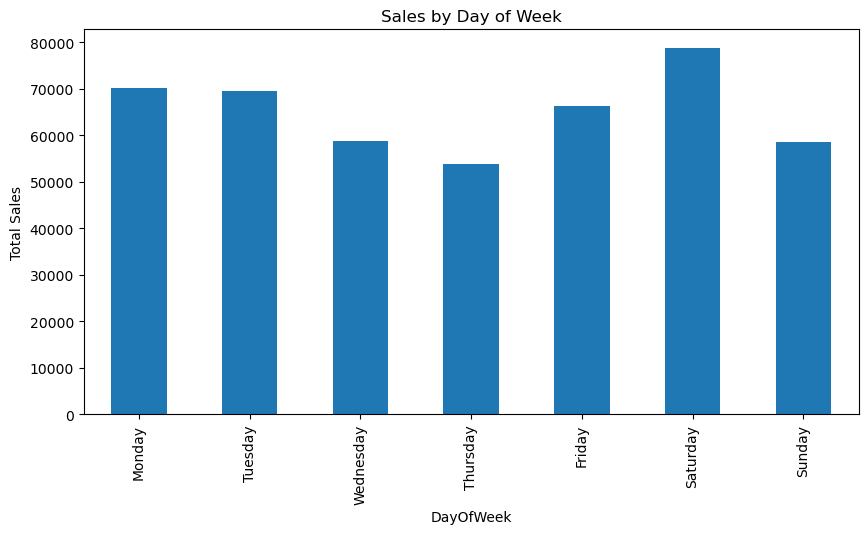

In [28]:
#4. Time Series Analysis
# Monthly sales trend
monthly_sales = df.groupby(['Year', 'Month'])['Total Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Amount', hue='Year')
plt.title('Monthly Sales Trend')
plt.xticks(range(1, 13))
plt.show()

# Day of week analysis
dow_sales = df.groupby('DayOfWeek')['Total Amount'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

dow_sales.plot(kind='bar', figsize=(10, 5))
plt.title('Sales by Day of Week')
plt.ylabel('Total Sales')
plt.show()


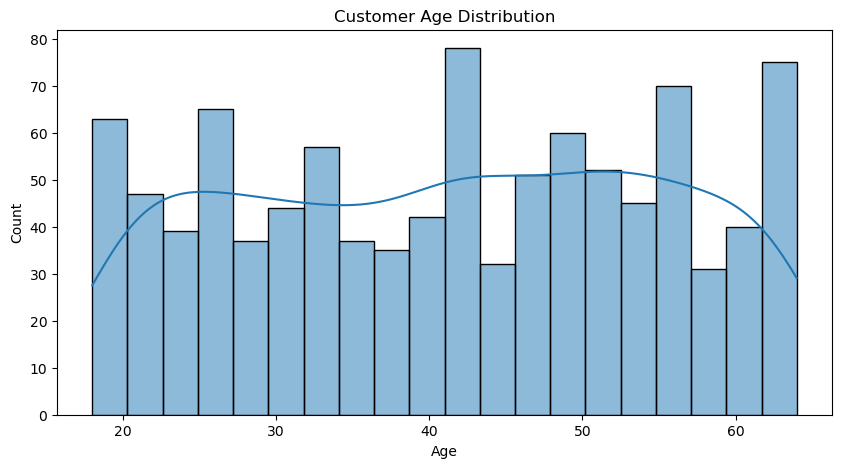

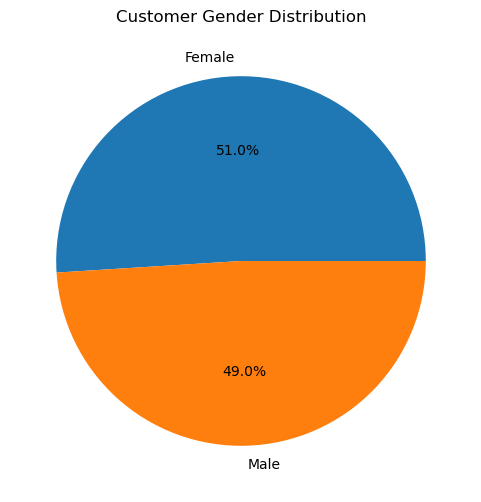

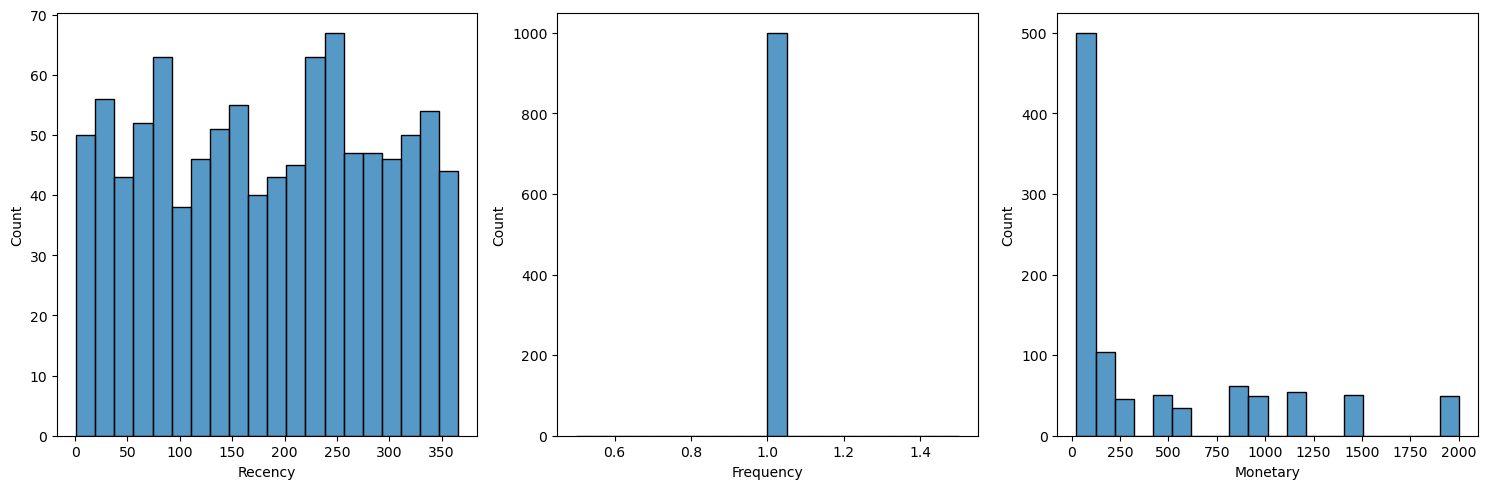

In [29]:
#5. Customer Analysis
# Age distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.show()

# Gender distribution
gender_dist = df['Gender'].value_counts()
gender_dist.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Customer Gender Distribution')
plt.ylabel('')
plt.show()

# RFM Analysis (Recency, Frequency, Monetary)
snapshot_date = df['Date'].max() + pd.Timedelta(days=1)

rfm = df.groupby('Customer ID').agg({
    'Date': lambda x: (snapshot_date - x.max()).days,
    'Transaction ID': 'count',
    'Total Amount': 'sum'
}).rename(columns={
    'Date': 'Recency',
    'Transaction ID': 'Frequency',
    'Total Amount': 'Monetary'
})

# Visualize RFM distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(rfm['Recency'], bins=20, ax=axes[0])
sns.histplot(rfm['Frequency'], bins=20, ax=axes[1])
sns.histplot(rfm['Monetary'], bins=20, ax=axes[2])
plt.tight_layout()
plt.show()

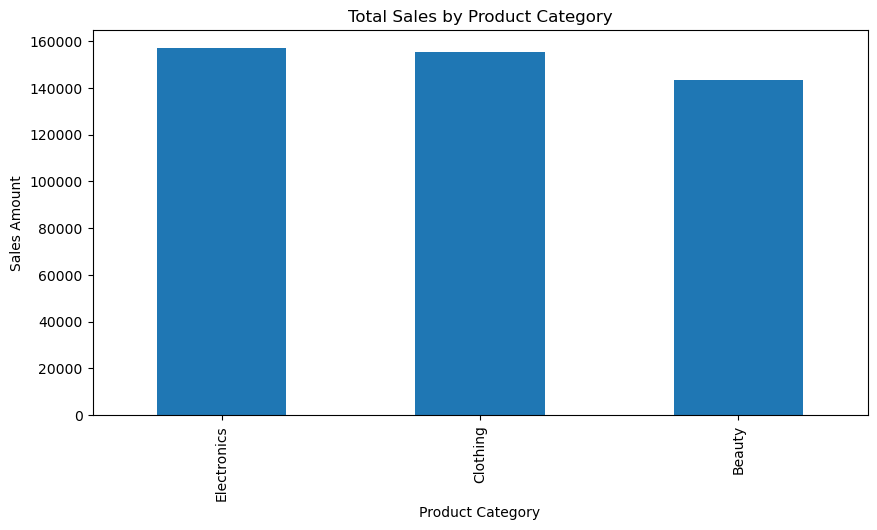

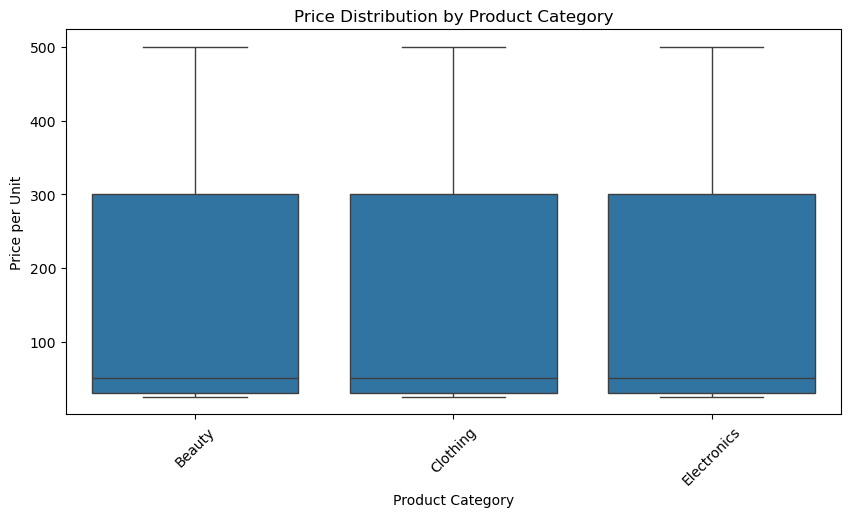

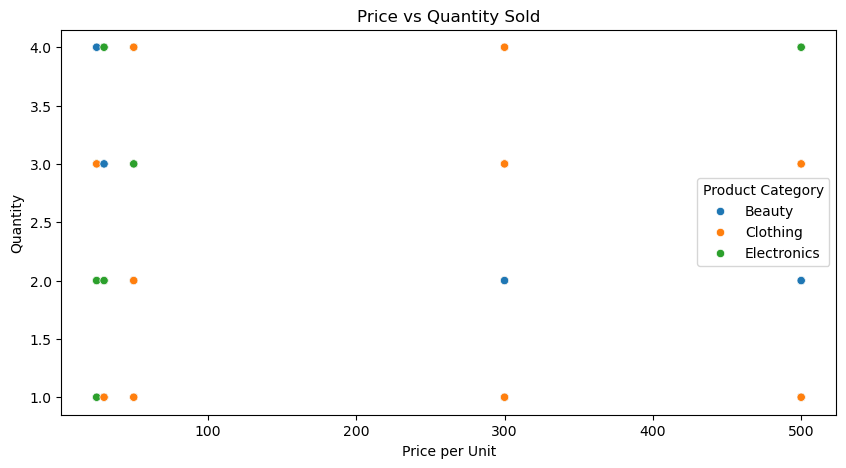

In [30]:
#6. Product Analysis
# Top product categories
top_categories = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
top_categories.plot(kind='bar')
plt.title('Total Sales by Product Category')
plt.ylabel('Sales Amount')
plt.show()

# Price distribution by category
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Product Category', y='Price per Unit')
plt.title('Price Distribution by Product Category')
plt.xticks(rotation=45)
plt.show()

# Quantity vs Price analysis
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Price per Unit', y='Quantity', hue='Product Category')
plt.title('Price vs Quantity Sold')
plt.show()